# Jonathan Halverson
# Thursday, January 4, 2018
# Generating a digital audio signal from scratch

Here we create a time varying signal and write it out in WAV format. This can then be played. I thought that a sinusoid with the same frequency as a chosen piano note would sound the same. The two sound nothing alike. There is an entire field devoted to creating digital audio from scratch such that it sounds like real instruments.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [3]:
from scipy.io import wavfile

f = 'datasets/speech_commands_v0.01/marvin/6a861f21_nohash_0.wav'
sample_rate, data = wavfile.read(f) # 16-bit  PCM  -32768  +32767  int16
times = np.arange(data.size) / float(sample_rate)

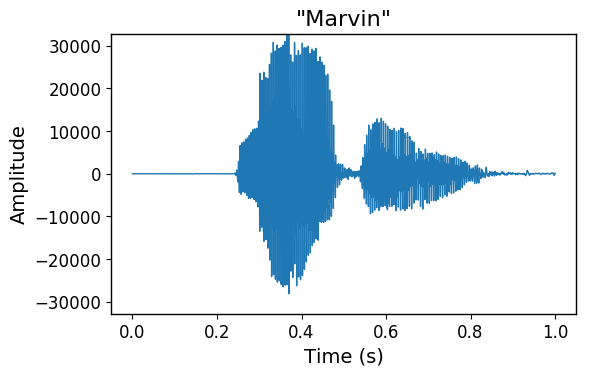

In [4]:
plt.plot(times, data)
plt.ylim(-2**15, 2**15)
plt.title('"Marvin"')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

#### Artificial sound constructed from mathematics

In [5]:
sample_rate = 16000
t = np.linspace(0.0, 10.0, 10 * sample_rate)
#data = np.sin(5000 * t * t) * np.sin(500 * t)
data = np.sin(2.0 * np.pi * 440.0 * t) * np.exp(-t/4)

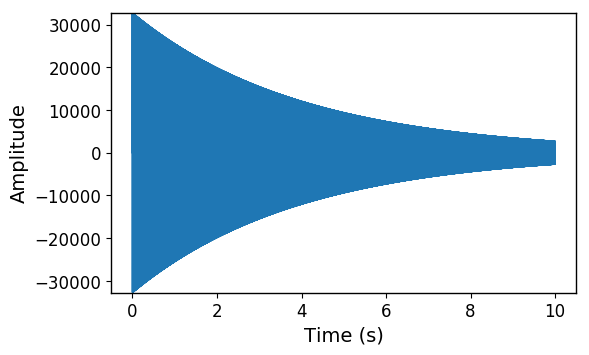

In [6]:
data = (2**15 - 1) * data / max(data.max(), -data.min())
data = data.astype(np.int)
plt.plot(t, data)
plt.ylim(-2**15, 2**15)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [7]:
wavfile.write('test.wav', sample_rate, data)

### Piano

In [8]:
# note that the signal is in stereo so two channels
sample_rate, data = wavfile.read('a1.wav')
times = np.arange(data.shape[0]) / float(sample_rate)

In [9]:
sample_rate

44100

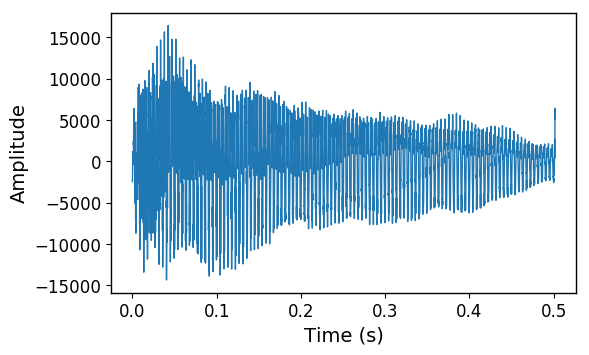

In [10]:
plt.plot(times, data[:,1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

The piano note and the artificially constructed audio file do not sound alike. And of course their waveforms are completely different.

### Spectrogram check

In [70]:
sample_rate = 48000
t = np.linspace(0.0, 1.0, sample_rate)
data = np.sin(2 * np.pi * 3000.0 * t) + 2 * np.sin(2 * np.pi * 1500.0 * t)

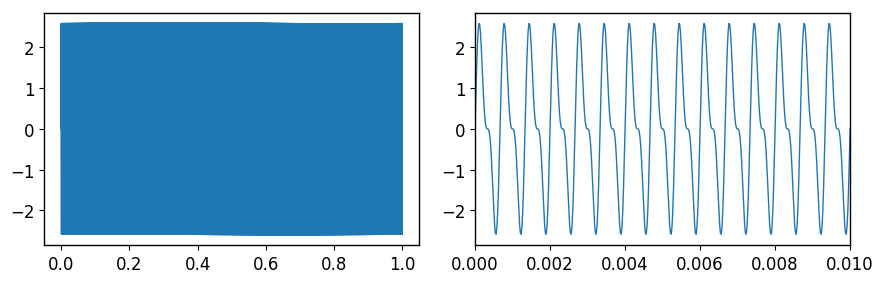

In [71]:
plt.subplots(figsize=(9, 3))
plt.subplot(121)
plt.plot(t, data)
plt.subplot(122)
plt.plot(t, data)
plt.xlim(0, 0.01)
plt.tight_layout()

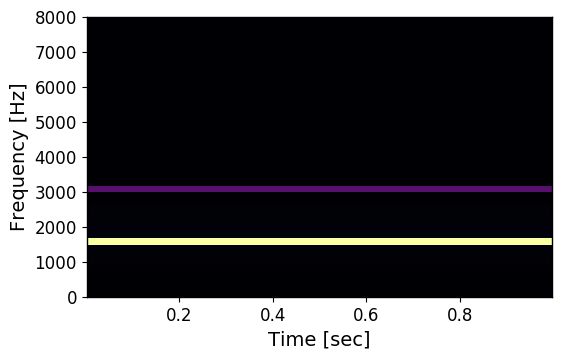

In [72]:
from scipy import signal

frequencies, times, spectrogram = signal.spectrogram(data, fs=sample_rate, window=('tukey', 0.25), scaling='density')

plt.pcolormesh(times, frequencies, spectrogram, cmap='inferno')
plt.ylim(0, 8e3)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [73]:
freq = np.fft.fftfreq(n=data.size, d=1.0/sample_rate)
Xn = np.fft.fft(data) / data.size
ind = np.argwhere(freq > 0.0).flatten()
psd = np.absolute(Xn[ind])**2 + np.absolute(Xn[-ind])**2

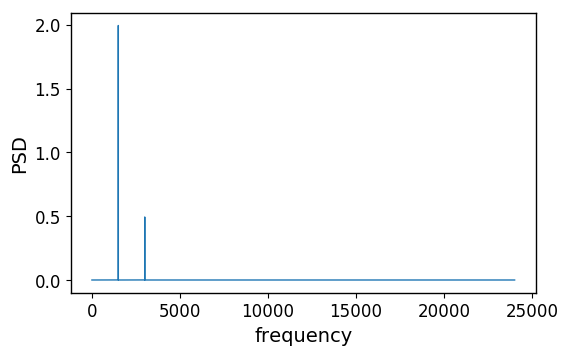

In [74]:
plt.plot(freq[ind], psd)
plt.xlabel('frequency')
plt.ylabel('PSD')